1 - Para os dados do arquivo dados.txt, deve se desenvolver um gráfico de percentis (mais especificamente quartis) dos valores de pagamentos plotados para cada mês. Fora do cálculo dos quartis, os 5% valores de pagamentos mais altos para cada mês devem ser apresentados como pontos no gráfico que representam outliers.

In [1]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
url = 'https://drive.google.com/file/d/1SJqUew3li8HamOpIgl3hMDNdeZSzcIna/view?usp=sharing'
url2 = 'https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url2, sep = '\t')

#Organizando a base de dados a partir das datas

dfSorted = df.sort_values(by=['dt_pag'])

#Separando os pagamentos por mês a partir das datas

janeiro = dfSorted[dfSorted['dt_pag'].between("2020-01-01", "2020-01-31")]
fevereiro = dfSorted[dfSorted['dt_pag'].between("2020-02-01", "2020-02-29")]
marco = dfSorted[dfSorted['dt_pag'].between("2020-03-01", "2020-03-31")]
abril = dfSorted[dfSorted['dt_pag'].between("2020-04-01", "2020-04-30")]
maio = dfSorted[dfSorted['dt_pag'].between("2020-05-01", "2020-05-31")]
junho = dfSorted[dfSorted['dt_pag'].between("2020-06-01", "2020-06-30")]
julho = dfSorted[dfSorted['dt_pag'].between("2020-07-01", "2020-07-31")]
agosto = dfSorted[dfSorted['dt_pag'].between("2020-08-01", "2020-08-31")]
setembro = dfSorted[dfSorted['dt_pag'].between("2020-09-01", "2020-09-30")]
outubro = dfSorted[dfSorted['dt_pag'].between("2020-10-01", "2020-10-31")]
novembro = dfSorted[dfSorted['dt_pag'].between("2020-11-01", "2020-11-30")]
dezembro = dfSorted[dfSorted['dt_pag'].between("2020-12-01", "2020-12-31")]

#Removendo outliers e mantendo apenas os 5% mais altos, através da função quantile(0.95), onde 0.95 é o 95º percentil

janeiro['vl_pag'] = np.where(janeiro['vl_pag'] >67779.47, 67779.47,janeiro['vl_pag'])
fevereiro['vl_pag'] = np.where(fevereiro['vl_pag'] >67779.47, 67779.47,fevereiro['vl_pag'])
marco['vl_pag'] = np.where(marco['vl_pag'] >67779.47, 67779.47,marco['vl_pag'])
abril['vl_pag'] = np.where(abril['vl_pag'] >67779.47, 67779.47,abril['vl_pag'])
maio['vl_pag'] = np.where(maio['vl_pag'] >67779.47, 67779.47,maio['vl_pag'])
junho['vl_pag'] = np.where(junho['vl_pag'] >152083.57, 152083.57,junho['vl_pag'])
julho['vl_pag'] = np.where(julho['vl_pag'] >87735.65, 87735.65,julho['vl_pag'])
agosto['vl_pag'] = np.where(agosto['vl_pag'] >81188.65, 81188.65,agosto['vl_pag'])
setembro['vl_pag'] = np.where(setembro['vl_pag'] >146721.20, 146721.20,setembro['vl_pag'])

# Outubro, Novembro e Dezembro não possuem valores para serem calculados, mas os números colocados para comparação poderiam 
# ser armazenados em variáveis após o seu calculo e, assim que valores fossem adicionados às bases de dados desses meses ou 
# até mesmo dos outros, eles seriam atualizados e executados

/srv/conda/envs/notebook/lib/python3.6/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/srv/conda/envs/notebook/lib/python3.6/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/srv/conda/envs/notebook/lib/python3.6/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

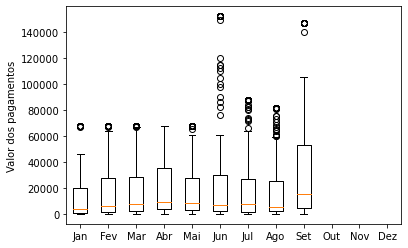

In [3]:
#Gráfico de Boxplots

labels = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']
arrayPag = [janeiro['vl_pag'],fevereiro['vl_pag'],marco['vl_pag'],abril['vl_pag'],
            maio['vl_pag'],junho['vl_pag'],julho['vl_pag'],agosto['vl_pag'],
            setembro['vl_pag'],outubro['vl_pag'], novembro['vl_pag'], dezembro['vl_pag']]
plt.boxplot(x = arrayPag, showfliers = True, labels = labels)
plt.ylabel('Valor dos pagamentos')
plt.show()

2 - A coluna dias para pagamento apresenta a quantidade de dias após o produto/serviço se tornar apto ao pagamento. Existe algum indício de que pagamentos mais altos estão sendo beneficiados? Ou seja, são realizados em uma quantidade menor de dias? (Forneça subsídios formais [matemáticos ou estatísticos] para sua resposta).

Se levarmos em conta a maior média de pagamentos altos dos meses individualmente (Junho com aproximadamente 152000), temos 179 dados acima dessa média, onde 111 deles precisam de até 10 dias para o pagamento, representando 8,95% dos 1240 do total que precisam desse mesmo intervalo de dias. Porém essa quantidade de elementos (179) não representa uma porcentagem expressiva do total. Mesmo se considerarmos uma média entre as médias superiores de todos os meses, que é aproximadamente 89000, apenas 290 elementos estão acima desta. Ainda que comparemos por proporções, temos que 159 desses 290 valores altos precisam de até 10 dias, representando 12,82% dos 1240 que precisam do mesmo intervalo de tempo. A menos que, se levarmos em consideração as proporções destes 290 valores altos com o total de 2619, pois teríamos que: 159 de 290 = 54,92% enquanto que 1240 de 2619 = 47,34%. Então vemos que, somente neste panorâma, poderíamos assumir que os valores mais altos estão sendo beneficiados, caso contrário, não.


In [4]:
pd.options.display.max_rows = None
df.sort_values(by=['dias_para_pagamento'])

,dt_pag,vl_pag,dias_para_pagamento
2618,2020-09-11,46607.00,0
2518,2020-03-30,19069.22,0
2517,2020-03-30,33897.70,0
2516,2020-03-30,76734.75,0
2515,2020-03-30,112694.68,0
2514,2020-03-30,104842.37,0
2513,2020-03-27,15610.00,0
2512,2020-03-27,1515.00,0
2511,2020-03-26,16800.00,0
2510,2020-03-26,66756.72,0


3 - Construa uma análise descritiva o mais detalhada possível dos dados de forma a prover descobertas que uma simples análise visual dos dados (através da plotagem do gráfico) não forneça.

In [8]:
pd.options.display.max_rows = None
df.sort_values(by=['vl_pag'])

,dt_pag,vl_pag,dias_para_pagamento
2200,2020-01-31,0.50,4
2480,2020-02-13,5.76,0
2206,2020-02-10,5.76,4
2216,2020-02-10,8.08,4
88,2020-05-28,8.97,51
2583,2020-07-24,26.98,0
2610,2020-08-26,27.76,0
1094,2020-07-24,38.00,16
2605,2020-08-12,38.00,0
617,2020-07-24,39.68,24


In [9]:
pd.options.display.max_rows = None
df.sort_values(by=['dt_pag'])

,dt_pag,vl_pag,dias_para_pagamento
2465,2020-01-07,4000.00,0
2070,2020-01-08,1400.00,6
1831,2020-01-10,840.00,8
1830,2020-01-10,1150.00,8
2199,2020-01-10,797.00,4
1466,2020-01-14,321.84,12
1585,2020-01-14,189.00,11
1467,2020-01-14,5437.37,12
2397,2020-01-17,374412.47,1
2396,2020-01-17,152738.96,1


Alguns dados observados:
Dos 2619 elementos presentes na base de dados, apenas 313 precisam de mais de 30 dias para o pagamento;
Janeiro é o mês com menos elementos, além disso, possui a menor média superior de valores, sendo de aproximadamente 67000, em conjunto com fevereiro, março, abril e maio. Também possui o menor intervalo de dias de pagamento, sendo de 0 até 29;
Março é o mês que possui o maior número de elemntos, sendo 70 apenas no dia 4;
Junho é o mês com a maior média superior de valores, sendo de 152000 aproximadamente;
Julho é o terceiro mês com mais elementos, sendo 82 apenas no dia 1, sendo o dia com mais transações. Além disso, Julho possui o pagamento mais demorado, de 185 dias;
A base de dados possui 17 pagamentos acima de 1 milhão, sendo julho o mês que mais possui essas transações (4 no total);

Mais dados abaixo:

In [5]:
# count - contagem dos valores
# mean - média
# std - desvio padrão
# min - valor mínimo
# 25% - primeiro quartil
# 50% - segundo quartil
# 75% - terceiro quartil
# max - valor máximo
# dtype - tipo de dado

# Dados relacionados aos valores dos pagamentos
print()
print('--------- Dados relacionados aos valores dos pagamentos ---------')
print()
print('Mediana: ')
print(df['vl_pag'].median())
print()
print('Moda: ')
print(df['vl_pag'].mode())
print()
print('Amplitude: ')
print(df['vl_pag'].max() - df['vl_pag'].min())
print()
print('Variância: ')
print(df['vl_pag'].var())
print()
print('Desvio absoluto: ')
print(df['vl_pag'].mad())
print()
print(df['vl_pag'].describe())

# Dados relacionados aos dias para pagamento
print()
print('--------- Dados relacionados aos dias para pagamento ---------')
print()
print('Mediana: ')
print(df['dias_para_pagamento'].median())
print()
print('Moda: ')
print(df['dias_para_pagamento'].mode())
print()
print('Amplitude: ')
print(df['dias_para_pagamento'].max() - df['dias_para_pagamento'].min())
print()
print('Variância: ')
print(df['dias_para_pagamento'].var())
print()
print('Desvio absoluto: ')
print(df['dias_para_pagamento'].mad())
print()
print(df['dias_para_pagamento'].describe())


--------- Dados relacionados aos valores dos pagamentos ---------

Mediana: 
7542.38

Moda: 
0    5610.0
dtype: float64

Amplitude: 
3493432.48

Variância: 
42981866369.026344

Desvio absoluto: 
69993.92082850366

count    2.619000e+03
mean     5.221270e+04
std      2.073207e+05
min      5.000000e-01
25%      2.205340e+03
50%      7.542380e+03
75%      2.833350e+04
max      3.493433e+06
Name: vl_pag, dtype: float64

--------- Dados relacionados aos dias para pagamento ---------

Mediana: 
14.0

Moda: 
0    14
dtype: int64

Amplitude: 
185

Variância: 
283.48578044151117

Desvio absoluto: 
10.898084182599009

count    2619.000000
mean       17.378007
std        16.837036
min         0.000000
25%         7.000000
50%        14.000000
75%        22.000000
max       185.000000
Name: dias_para_pagamento, dtype: float64


4 - Para a base de dados yeast, divida de forma estratificada (mantendo a proporção entre as classes) a base entre duas bases: treinamento e teste. A base de treinamento deve conter 60% do total de dados e a de teste os 40% restantes. Crie um modelo de classificador unicamente com os dados de treinamento e tente aprimorar a classificação desse classificador aplicado à base de teste. Informe o desempenho desse classificador para cada classe separadamente.

Não consegui entender a base de dados quais eram as classes ou o que cada dado em cada linha/coluna significava.